In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from datetime import datetime

In [2]:
df = pd.read_csv('../data/01_raw/booking.csv')

In [3]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [4]:
df.info()  #set Booking_id as index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df['market segment type'].value_counts()


market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [7]:
df['date of reservation'].value_counts()  #need to turn this into a datetime object


date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
             ... 
10/2/2015       1
7/24/2017       1
9/13/2016       1
5/20/2017       1
7/21/2017       1
Name: count, Length: 553, dtype: int64

In [8]:
df['booking status'].value_counts()


booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [9]:
df['type of meal'].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [10]:
df['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

To check:
- outliers
- duplicates
- correlation
- ...

Checking missing values

From data article (https://www.sciencedirect.com/science/article/pii/S2352340918315191/pdfft?md5=3e41bb8e7cf542399dae4d45e80b7c86&pid=1-s2.0-S2352340918315191-main.pdf):

"Data was obtained directly from the hotels’ PMS (Property Management System) databases’. ... The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined
as “NULL” it means that the booking did not came from a travel agent."

In [11]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


Checking for duplicates

In [12]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


Checking date of reservation

In [13]:
# Convert with errors='coerce' to get NaT for invalid
converted_dates = pd.to_datetime(df['date of reservation'], errors='coerce')

# Show original values where conversion failed (NaT)
invalid_dates = df.loc[converted_dates.isna(), 'date of reservation']

print("Values that cannot be converted to dates:")
print(invalid_dates)

Values that cannot be converted to dates:
2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
18380    2018-2-29
18534    2018-2-29
18680    2018-2-29
19013    2018-2-29
20419    2018-2-29
21674    2018-2-29
21688    2018-2-29
26108    2018-2-29
27559    2018-2-29
27928    2018-2-29
30552    2018-2-29
30616    2018-2-29
30632    2018-2-29
30839    2018-2-29
32041    2018-2-29
34638    2018-2-29
35481    2018-2-29
Name: date of reservation, dtype: object


In [15]:
print(f'{len(invalid_dates)} bookings have invalid reservation date: Feb 29, 2018, while 2018 was not a leap year.')

37 bookings have invalid reservation date: Feb 29, 2018, while 2018 was not a leap year.


In [16]:
# first, we will convert the column values to datetime
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,2018-04-11,Canceled


In [17]:
# checking for invalid dates
invalid_dates = df['date of reservation'].isna().sum()
print(f"Invalid 'date of reservation' entries after parsing: {invalid_dates}")

Invalid 'date of reservation' entries after parsing: 37


In [18]:
today = pd.Timestamp(datetime.today().date())
future_dates = (df['date of reservation'] > today).sum()
print(f"Number of future reservation dates: {future_dates}")

Number of future reservation dates: 0


In [19]:
old_dates = (df['date of reservation'] < pd.Timestamp('2015-10-02')).sum()
print(f"Number of 'date of reservation' before 2015-07-01: {old_dates}")

Number of 'date of reservation' before 2015-07-01: 0


In [20]:
recent_dates = (df['date of reservation'] > pd.Timestamp('2018-12-31')).sum()
print(f"Number of 'date of reservation' after 2017-07-01: {recent_dates}")

Number of 'date of reservation' after 2017-07-01: 0


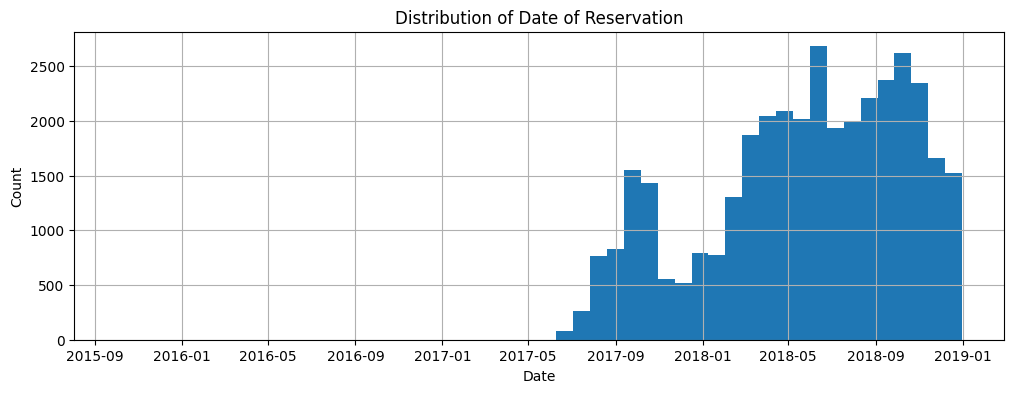

In [21]:
# plotting histogram of reservation dates
plt.figure(figsize=(12,4))
df['date of reservation'].hist(bins=50)
plt.title("Distribution of Date of Reservation")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

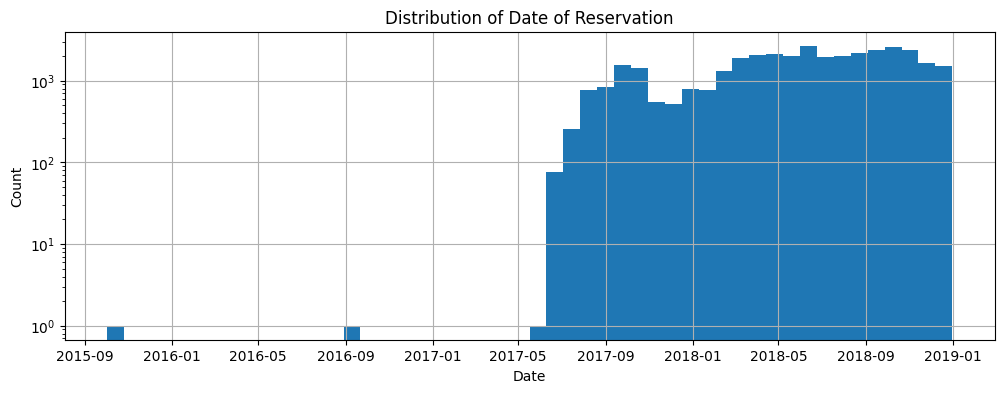

In [22]:
# plotting histogram of reservation dates on log-scale to see very old dates with few reservations
plt.figure(figsize=(12,4))
plt.yscale("log")
df['date of reservation'].hist(bins=50)
plt.title("Distribution of Date of Reservation")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [23]:
outliers_dates = (df['date of reservation'] < pd.Timestamp('2017-06-01')).sum()
print(f"Number of 'date of reservation' before 2017-06-01: {outliers_dates}")

Number of 'date of reservation' before 2017-06-01: 3


There are only 3 reservations which date from before June 1, 2017

In [24]:
df.loc[df['date of reservation'] < pd.Timestamp('2017-06-01')]

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,2015-10-02,Not_Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,2017-05-20,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.0,1,2016-09-13,Canceled


These dates represent 3 bookings made more than 7 months in advance (lead time > 211).

### Statistics

Some of the columns with datatypes int64 are not really numeric (car parking space, repeated) but binary (0/1 meaning no/yes).

In [25]:
binary_cols = ['car parking space', 'repeated']

Distribution of binary columns

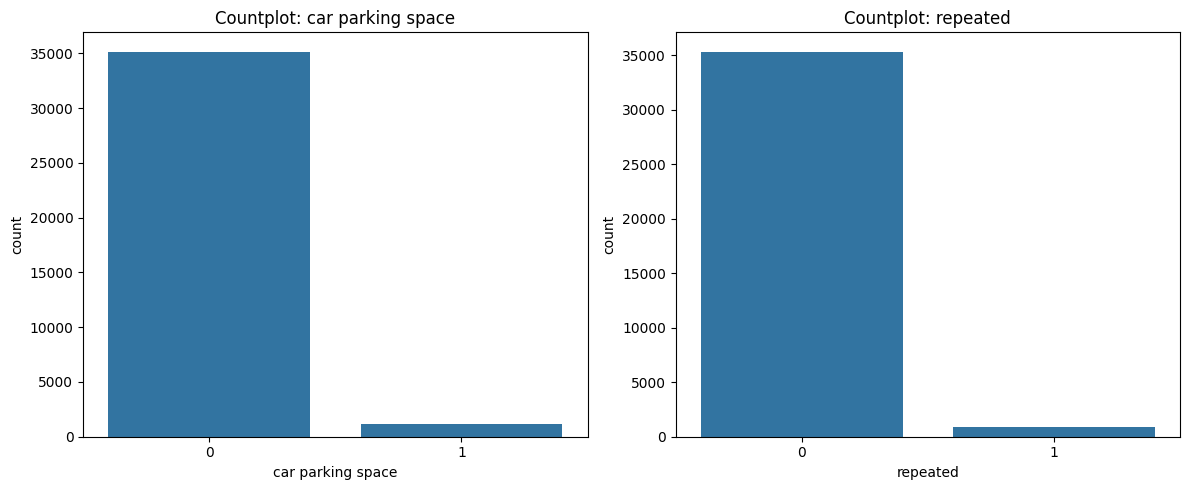

In [26]:
plt.figure(figsize=(12,5))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot: {col}")
plt.tight_layout()
plt.show()

Numeric columns

In [27]:
numeric_cols = ['number of adults', 'number of children', 'number of weekend nights',
                'number of week nights', 'lead time', 'P-C', 'P-not-C',
                'average price', 'special requests']

print(df[numeric_cols].describe())

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights     lead time           P-C       P-not-C  \
count           36285.000000  36285.000000  36285.000000  36285.000000   
mean                2.204602     85.239851      0.023343      0.153369   
std                 1.410946     85.938796      0.368281      1.753931   
min                 0.000000      0.000000    

Distribution of numeric columns

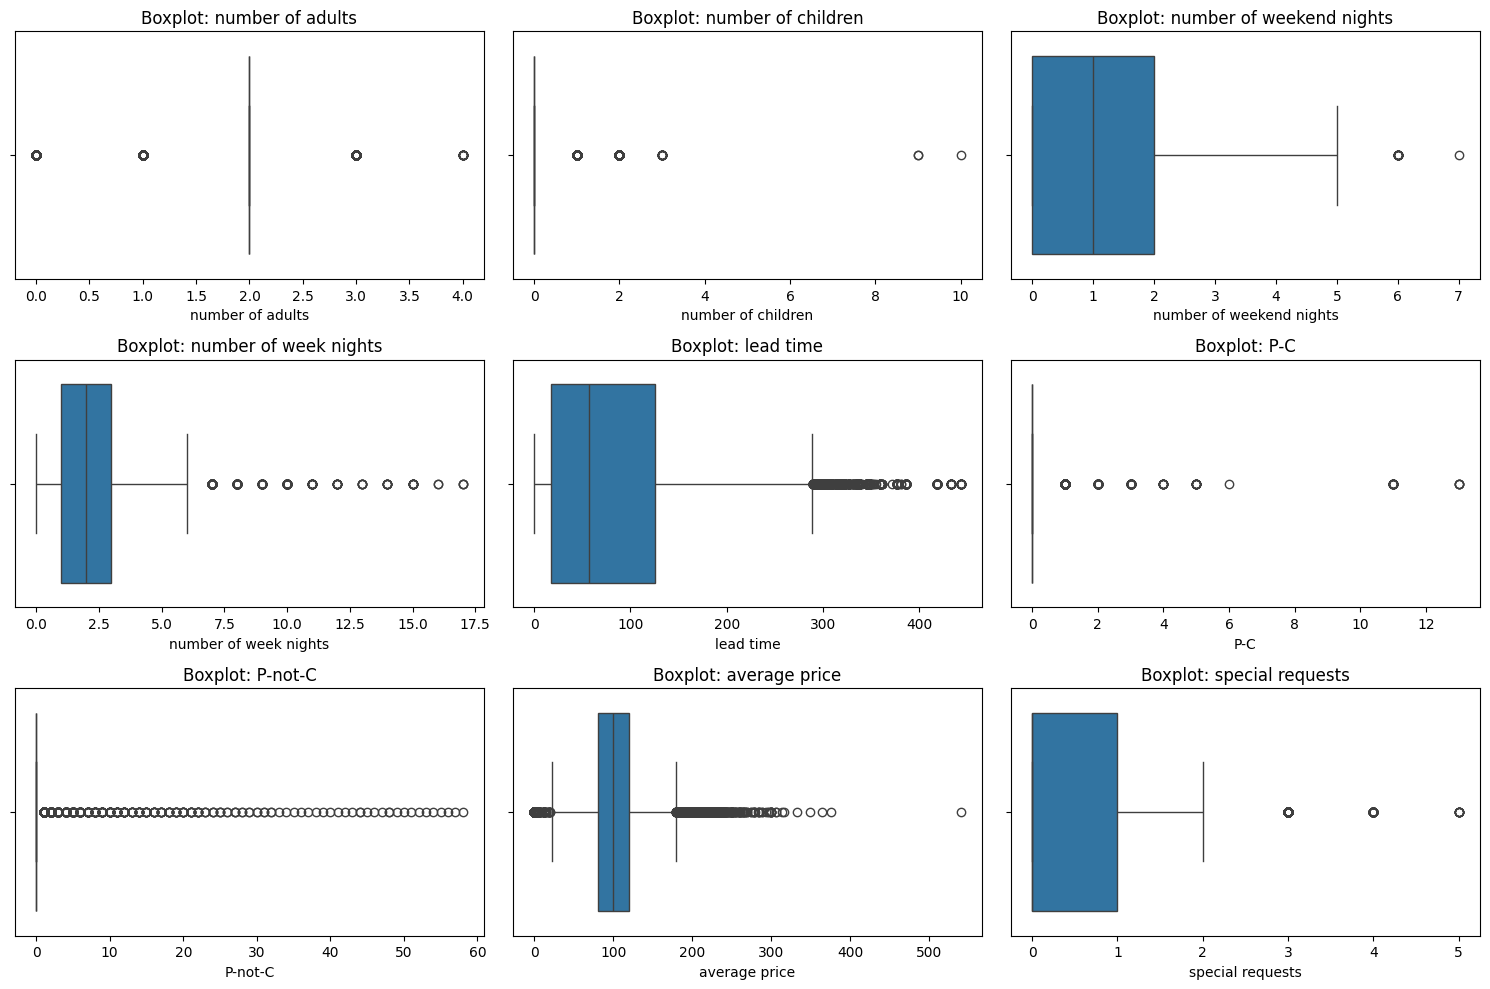

In [28]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()


Categorical columns

In [29]:
cat_cols = ['type of meal', 'room type', 'market segment type', 'booking status']

Distribution of categorical columns (including target variable "booking status")

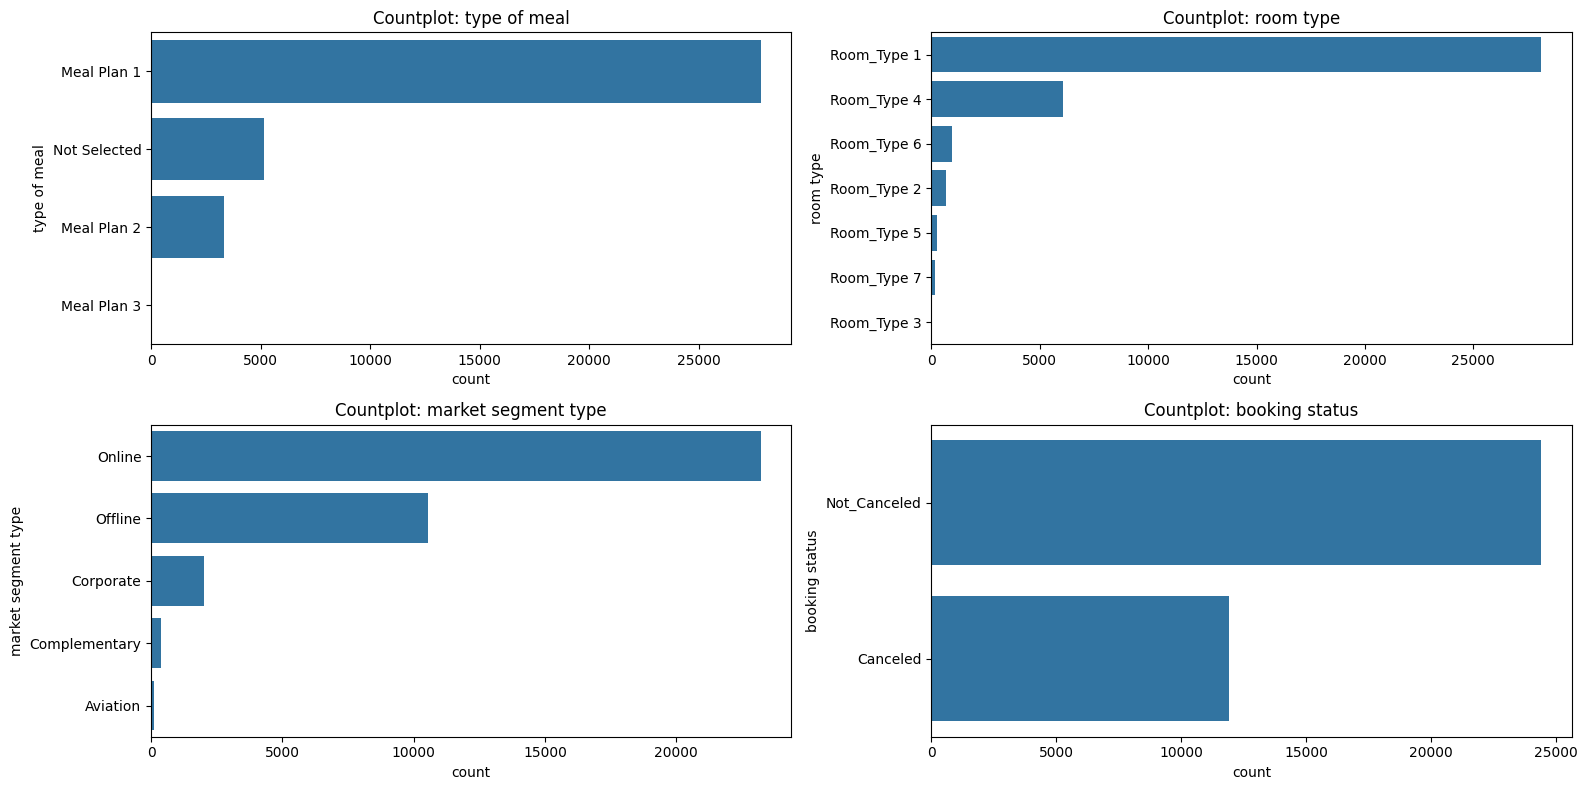

In [30]:
plt.figure(figsize=(16,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Countplot: {col}")
plt.tight_layout()
plt.show()

### Correlation

Correlation of numeric columns

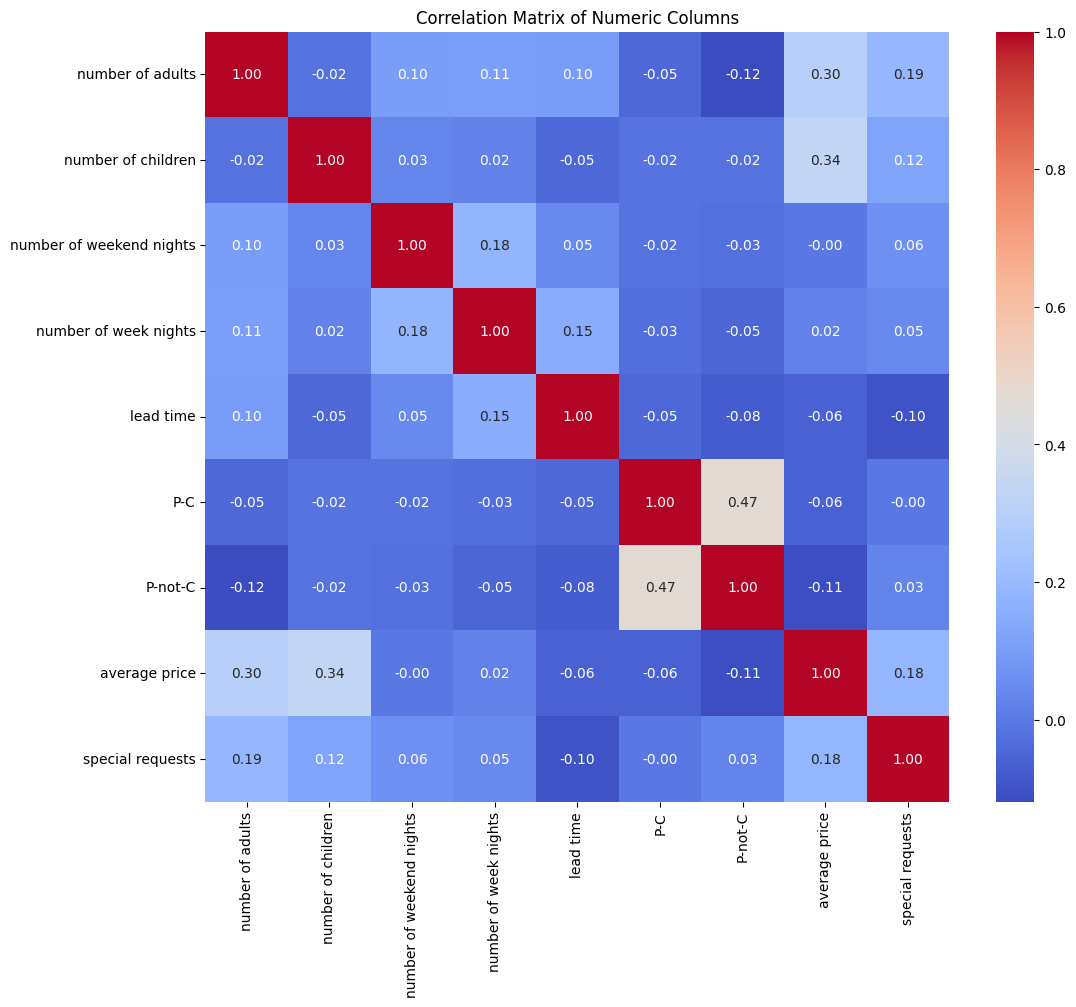

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

Most of the numeric column pairs show weak to almost no correlation.

Moderate positive correlation of average price with number of adults (0.3) and children (0.34) might mean that bookings with more guests can be associated with larger/more expensive rooms or services.

P-not-C and P-C have a moderate positive correlation (0.47), suggesting that customers with more past bookings (both canceled and not) tend to have both types of history.

Correlation between numeric columns and target variable

In [32]:
df['target_binary'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

print("Point Biserial Correlation between numeric columns and target:")
for col in numeric_cols:
    corr, pval = pointbiserialr(df['target_binary'], df[col])
    print(f"{col}: corr = {corr:.3f}, p-value = {pval:.3g}")


Point Biserial Correlation between numeric columns and target:
number of adults: corr = 0.087, p-value = 1.36e-61
number of children: corr = 0.033, p-value = 3.2e-10
number of weekend nights: corr = 0.061, p-value = 9.66e-32
number of week nights: corr = 0.093, p-value = 2.97e-70
lead time: corr = 0.438, p-value = 0
P-C: corr = -0.034, p-value = 1.31e-10
P-not-C: corr = -0.060, p-value = 1.82e-30
average price: corr = 0.142, p-value = 9.72e-164
special requests: corr = -0.253, p-value = 0


Lead time (0.438) has the strongest positive correlation, meaning longer advance booking is linked to higher chances of cancellation.

Special requests (-0.253) has a moderate negative correlation, so more special requests are associated with a lower chance of cancellation.

Average price (0.142) and number of week nights (0.093) have weak positive correlations, indicating slightly higher prices and longer stays relate to more cancellations.

Number of adults (0.087), number of weekend nights (0.061), and number of children (0.033) show very weak positive links to cancellation.

P-C (-0.034) and P-not-C (-0.060) have very weak negative correlations, suggesting that more previous bookings (canceled or not) slightly reduce cancellation risk.

All correlations are statistically significant given the extremely low p-values, but effect sizes vary, with lead time and special requests being the most meaningful.

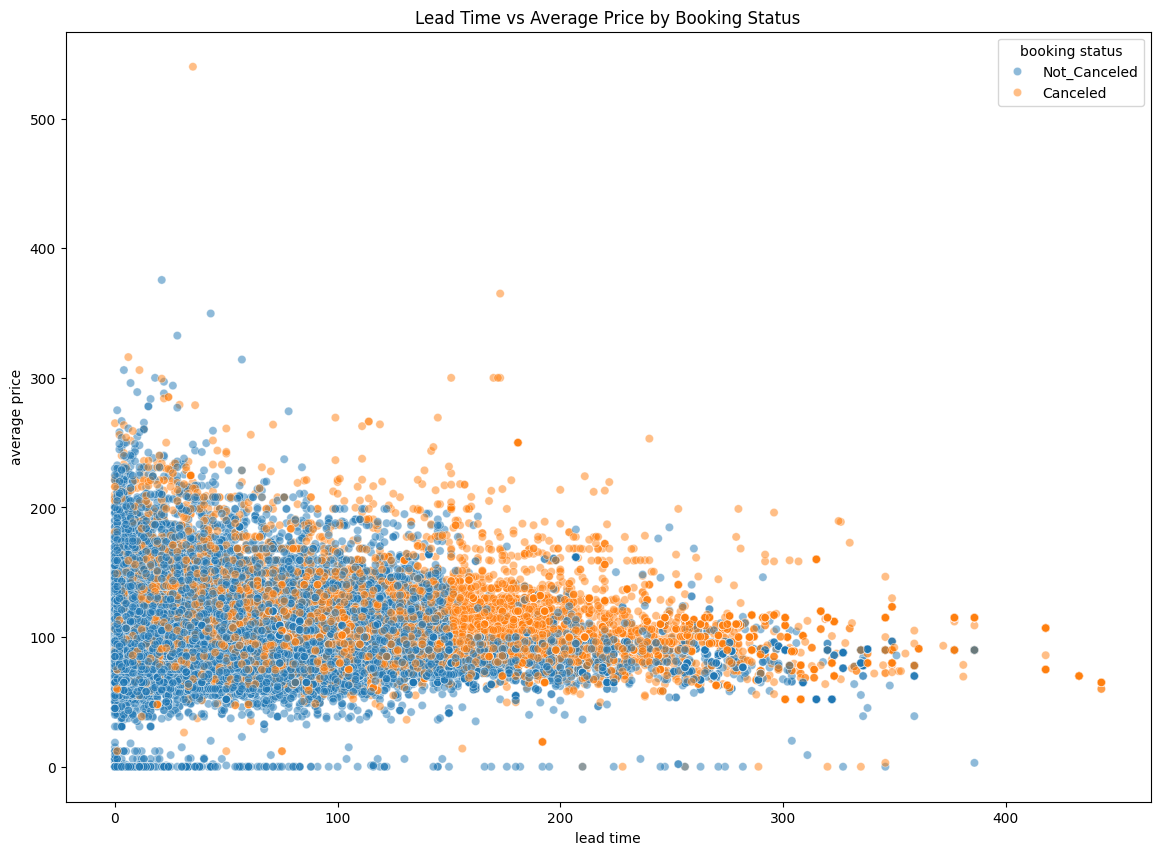

In [33]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='lead time', y='average price', hue='booking status', alpha=0.5, data=df)
plt.title("Lead Time vs Average Price by Booking Status")
plt.show()

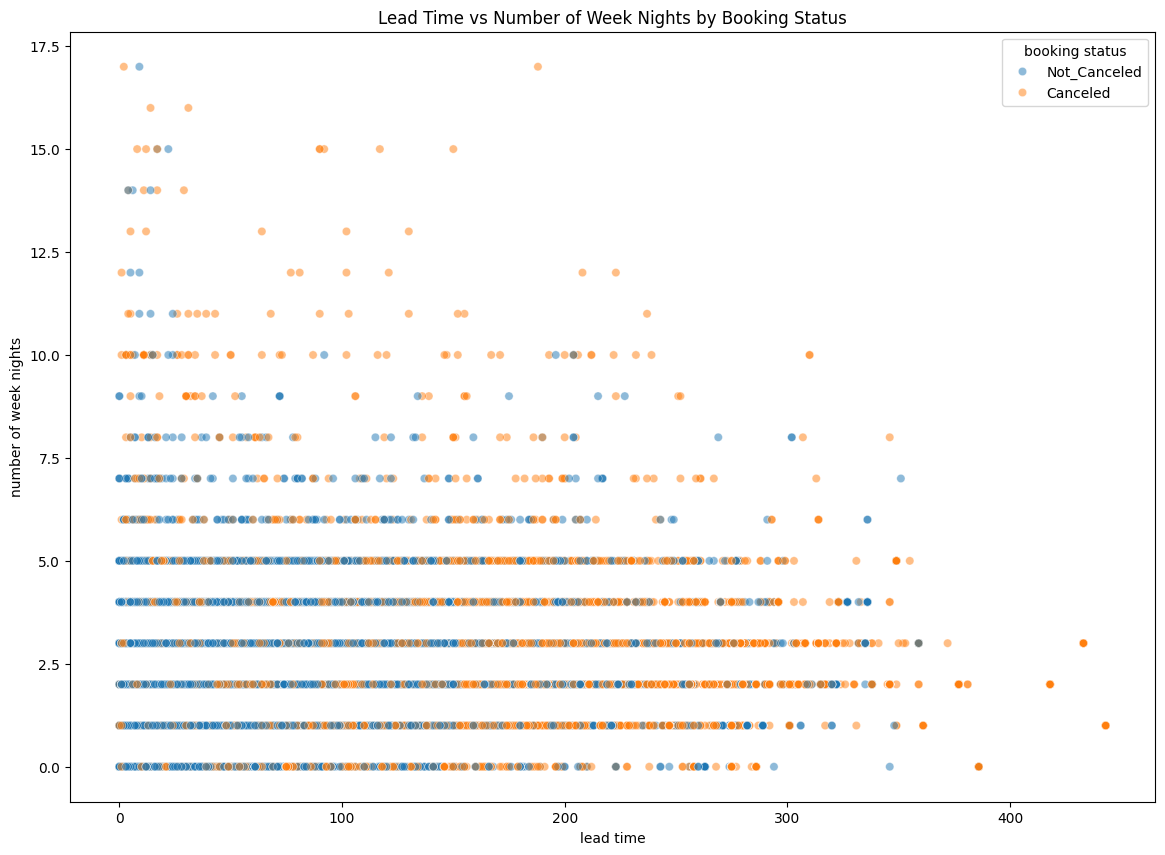

In [34]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='lead time', y='number of week nights', hue='booking status', alpha=0.5, data=df)
plt.title("Lead Time vs Number of Week Nights by Booking Status")
plt.show()

Longer stays booked long in advance have higher chances to be cancelled

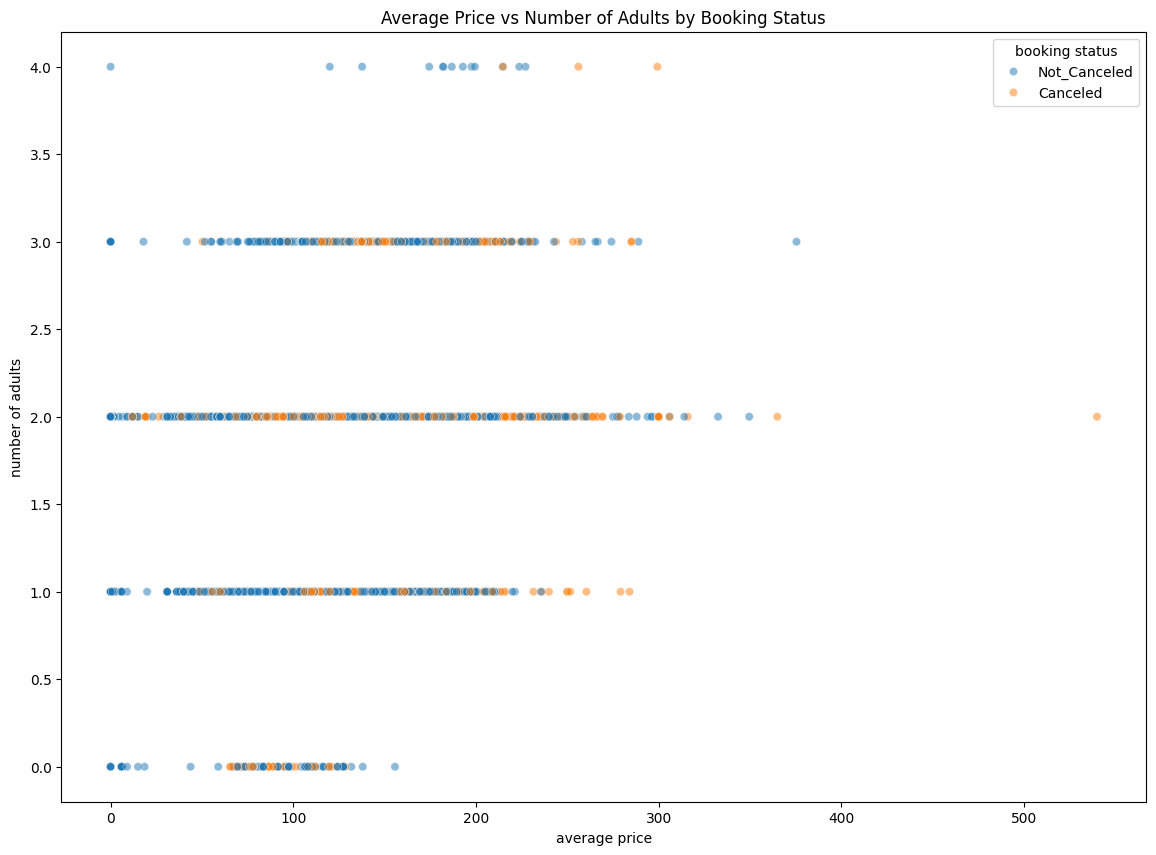

In [35]:
plt.figure(figsize=(14,10))
sns.scatterplot(x='average price', y='number of adults', hue='booking status', alpha=0.5, data=df)
plt.title("Average Price vs Number of Adults by Booking Status")
plt.show()

Chi-square tests for categorical columns and target variable

In [36]:
cat_cols_no_target = ['type of meal', 'room type', 'market segment type', 'car parking space', 'repeated']

print("\nChi-square test between categorical columns and target variable:")
for col in cat_cols_no_target:
    contingency_table = pd.crosstab(df[col], df['booking status'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{col}: chi2 = {chi2:.2f}, p-value = {p:.3g}")


Chi-square test between categorical columns and target variable:
type of meal: chi2 = 279.04, p-value = 3.42e-60
room type: chi2 = 57.18, p-value = 1.68e-10
market segment type: chi2 = 814.26, p-value = 6.25e-175
car parking space: chi2 = 268.43, p-value = 2.5e-60
repeated: chi2 = 416.13, p-value = 1.69e-92


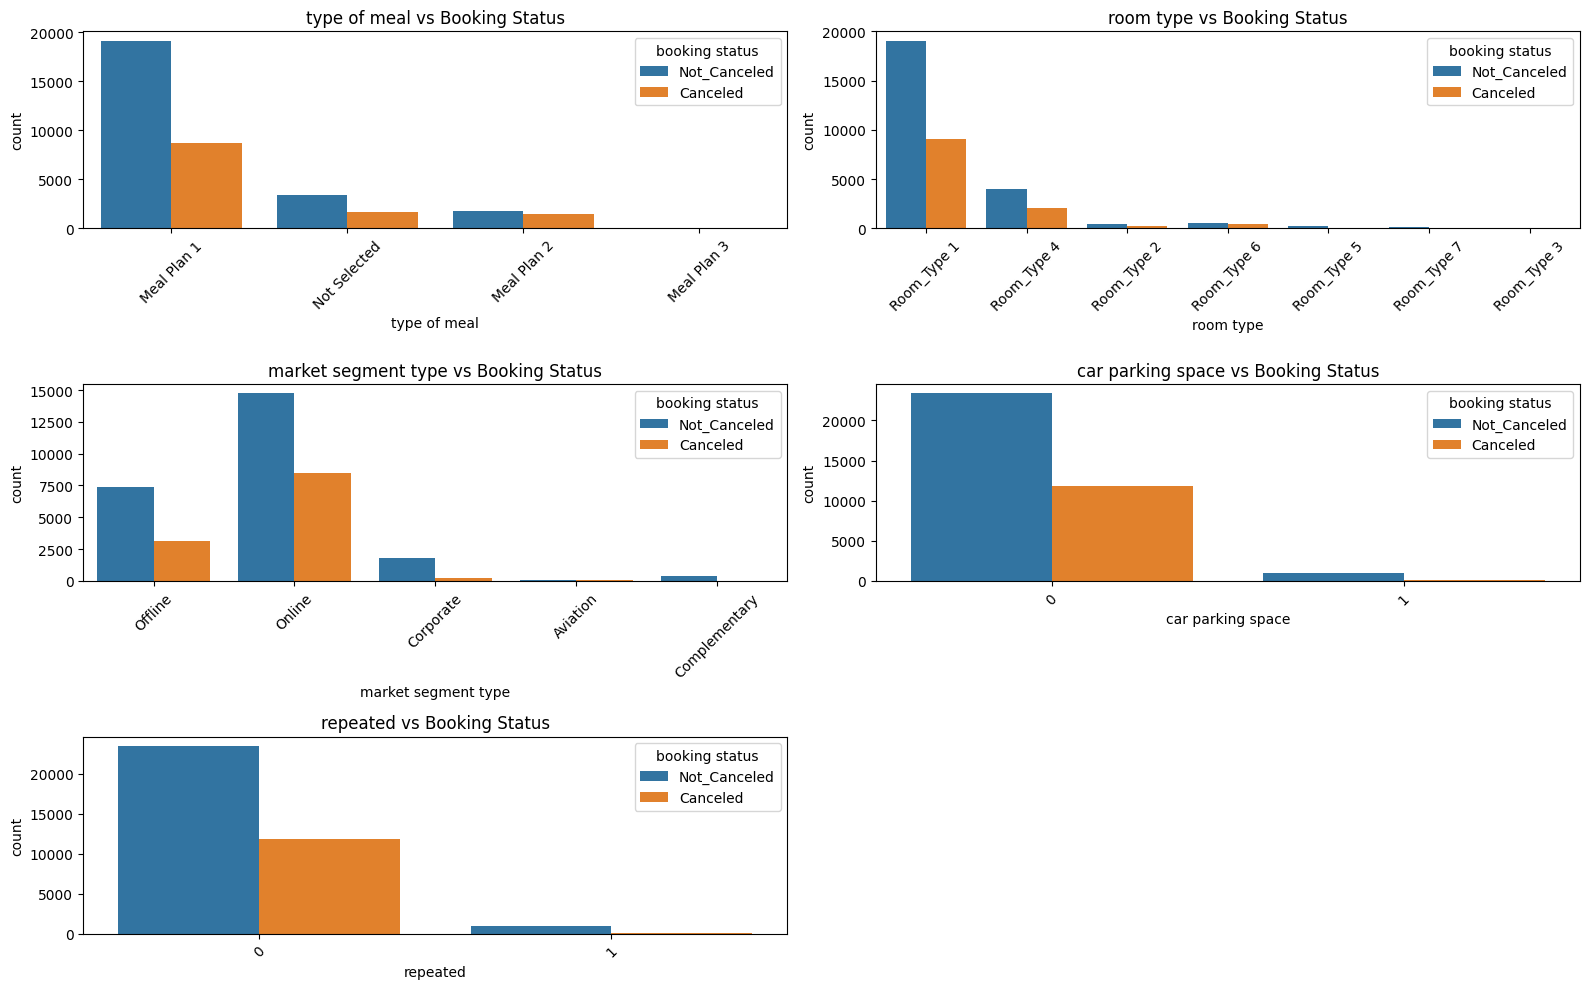

In [37]:
# target vs categorical columns
plt.figure(figsize=(16,10))
for i, col in enumerate(cat_cols_no_target, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='booking status', data=df)
    plt.title(f"{col} vs Booking Status")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Although chi-square values are high, the cancellation proportions within each category are similar, indicating that while there are many cancellations overall in large groups, the relative cancellation rate does not differ much between categories.